### 构建网络

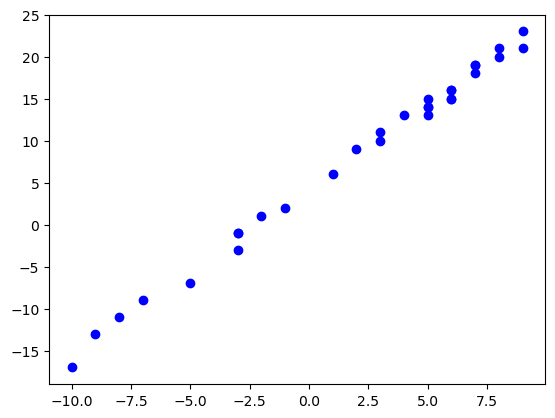

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

w = 2
b = 3
xlim = [-10, 10]
x_train = np.random.randint(low=xlim[0], high=xlim[1], size=30)

y_train = [w * x + b + random.randint(0,2) for x in x_train]

plt.plot(x_train, y_train, 'bo')

### 生成模型对象


In [2]:
import torch
from torch import nn

class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, input):
    return (input * self.weight) + self.bias

In [3]:
model = LinearModel()
x = torch.tensor(3)
y = model(x)

In [4]:
# 进行训练
model = LinearModel()
# 定义优化器
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, weight_decay=1e-2, momentum=0.9)

y_train = torch.tensor(y_train, dtype=torch.float32)
for _ in range(1000):
    input = torch.from_numpy(x_train)
    output = model(input)
    loss = nn.MSELoss()(output, y_train)
    model.zero_grad()
    loss.backward()
    optimizer.step()

In [5]:
# 查看参数信息
for parameter in model.named_parameters():
  print(parameter)
# 输出：

('weight', Parameter containing:
tensor([2.0280], requires_grad=True))
('bias', Parameter containing:
tensor([3.6018], requires_grad=True))
